# Model comparison

This notebook is to compare the performance of the different models.

In [1]:
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings

from datetime import datetime
from dateutil.relativedelta import relativedelta
from math import sqrt

from sklearn.metrics import mean_squared_error, mean_absolute_error, \
    mean_absolute_percentage_error, r2_score

warnings.filterwarnings('ignore')

/var/folders/sy/trsj1fws3q56ylqm17n583900000gn/T/ipykernel_54880/3067275405.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
ds_begin = datetime(2022, 7, 1)
ds_end = datetime(2024, 12, 1)
dates = pd.date_range(ds_begin, ds_end + relativedelta(months=1), freq='1M') - \
pd.offsets.MonthBegin(1)

In [3]:
import linear_regression

In [4]:
(y, y_hat_linear_regression) = linear_regression.backtest('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1, ds_begin, ds_end, 48, True)

In [5]:
APE_linear_regression = np.abs((y - y_hat_linear_regression) / y)

In [6]:
import ensemble_LR

In [7]:
features_sa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
               ('Metro_invt_fs_uc_sfrcondo_month', 1),
               ('Metro_new_listings_uc_sfrcondo_month', 1),
               ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_new_pending_uc_sfrcondo_month', 1),
               ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
               ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
               ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [8]:
(y, y_hat_ensemble_LR) = ensemble_LR.backtest(features_sa, 10, 0.9, ds_begin, ds_end, 48, True)

In [9]:
APE_ensemble_LR = np.abs((y - y_hat_ensemble_LR) / y)

In [10]:
import random_forest

In [11]:
features_sa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
               ('Metro_invt_fs_uc_sfrcondo_month', 1),
               ('Metro_new_listings_uc_sfrcondo_month', 1),
               ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_new_pending_uc_sfrcondo_month', 1),
               ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
               ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
               ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [12]:
(y, y_hat_random_forest) = random_forest.backtest(features_sa, 10, 0.7, ds_begin, ds_end, 48, True)

In [13]:
APE_random_forest = np.abs((y - y_hat_random_forest) / y)

In [14]:
import XGBoost

In [15]:
features_sa = [('Metro_sales_count_now_uc_sfrcondo_month', 1),
               ('Metro_invt_fs_uc_sfrcondo_month', 1),
               ('Metro_new_listings_uc_sfrcondo_month', 1),
               ('Metro_mean_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_mean_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_med_doz_pending_uc_sfrcondo_month', 1),
               ('Metro_median_sale_to_list_uc_sfrcondo_month', 2),
               ('Metro_new_pending_uc_sfrcondo_month', 1),
               ('Metro_perc_listings_price_cut_uc_sfrcondo_month', 1),
               ('Metro_pct_sold_above_list_uc_sfrcondo_month', 2),
               ('Metro_pct_sold_below_list_uc_sfrcondo_month', 2)]

In [16]:
(y, y_hat_XGBoost) = XGBoost.backtest(features_sa, 20, 10, ds_begin, ds_end, 48, True)

In [17]:
APE_XGBoost = np.abs((y - y_hat_XGBoost) / y)

In [18]:
import LSTM

In [19]:
features = ['Metro_sales_count_now_uc_sfrcondo_month',
            'Metro_invt_fs_uc_sfrcondo_month',
            'Metro_new_listings_uc_sfrcondo_month',
            'Metro_mean_doz_pending_uc_sfrcondo_month',
            'Metro_mean_sale_to_list_uc_sfrcondo_month',
            'Metro_med_doz_pending_uc_sfrcondo_month',
            'Metro_median_sale_to_list_uc_sfrcondo_month',
            'Metro_new_pending_uc_sfrcondo_month',
            'Metro_perc_listings_price_cut_uc_sfrcondo_month',
            'Metro_pct_sold_above_list_uc_sfrcondo_month',
            'Metro_pct_sold_below_list_uc_sfrcondo_month']

In [20]:
batch_size = 4
learning_rate = 5e-4
n_epochs = 100
(y, y_hat_LSTM_sa) = LSTM.backtest(features, 12, 2, 12, \
    batch_size, learning_rate, n_epochs, ds_begin, ds_end, 48, True)

In [21]:
APE_LSTM_sa = np.abs((y - y_hat_LSTM_sa) / y)

In [22]:
batch_size = 4
learning_rate = 5e-4
n_epochs = 100
(y, y_hat_LSTM) = LSTM.backtest(features, 14, 2, 18, \
    batch_size, learning_rate, n_epochs, ds_begin, ds_end, 48, False)

In [23]:
APE_LSTM = np.abs((y - y_hat_LSTM) / y)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


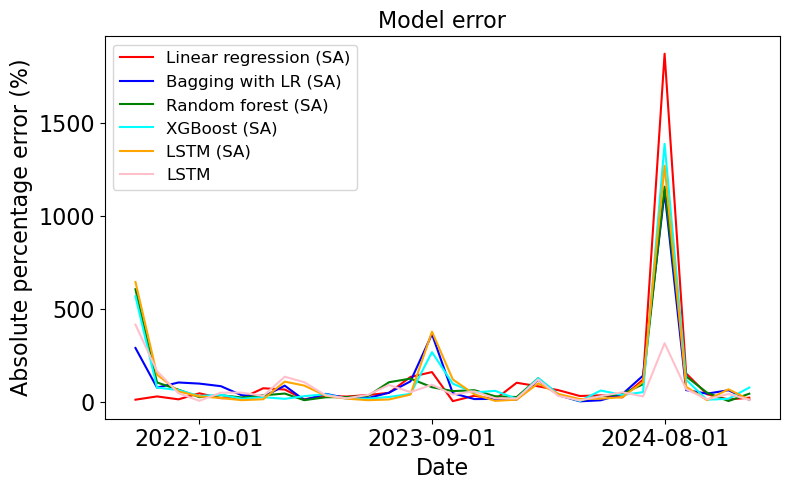

In [24]:
fig, ax = plt.subplots(figsize=(8, 5))

plt.plot(dates, 100 * APE_linear_regression, color='red', label='Linear regression (SA)')
plt.plot(dates, 100 * APE_ensemble_LR, color='blue', label='Bagging with LR (SA)')
plt.plot(dates, 100 * APE_random_forest, color='green', label='Random forest (SA)')
plt.plot(dates, 100 * APE_XGBoost, color='cyan', label='XGBoost (SA)')
plt.plot(dates, 100 * APE_LSTM_sa, color='orange', label='LSTM (SA)')
plt.plot(dates, 100 * APE_LSTM, color='pink', label='LSTM')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Absolute percentage error (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Model error', fontsize=16)

plt.tight_layout()
plt.savefig('figures/APE_6models.eps', format='eps')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


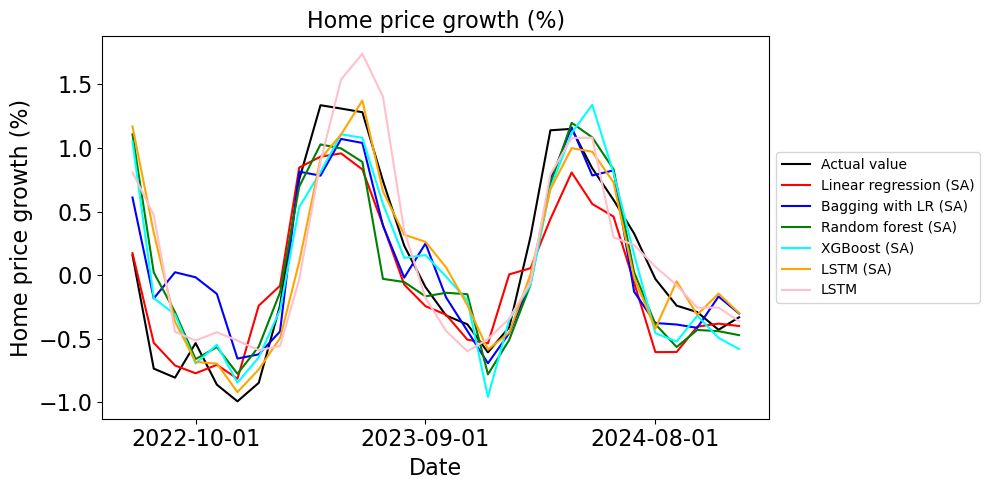

In [25]:
fig, ax = plt.subplots(figsize=(10, 5))

plt.plot(dates, 100 * y, color='black', label='Actual value')
plt.plot(dates, 100 * y_hat_linear_regression, color='red', label='Linear regression (SA)')
plt.plot(dates, 100 * y_hat_ensemble_LR, color='blue', label='Bagging with LR (SA)')
plt.plot(dates, 100 * y_hat_random_forest, color='green', label='Random forest (SA)')
plt.plot(dates, 100 * y_hat_XGBoost, color='cyan', label='XGBoost (SA)')
plt.plot(dates, 100 * y_hat_LSTM_sa, color='orange', label='LSTM (SA)')
plt.plot(dates, 100 * y_hat_LSTM, color='pink', label='LSTM')

plt.xlabel('Date', fontsize=16)
plt.ylabel('Home price growth (%)', fontsize=16)
ax.tick_params(axis='x', labelsize=16)
ax.tick_params(axis='y', labelsize=16)
ax.xaxis.set_ticks([datetime(2022, 10, 1), datetime(2023, 9, 1), datetime(2024, 8, 1)])
plt.legend(fontsize=12)
plt.title('Home price growth (%)', fontsize=16)

ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.savefig('figures/prediction_6models.eps', format='eps')
plt.show()

In [26]:
MSE = np.zeros(6)
RMSE = np.zeros(6)
MAE = np.zeros(6)
MAPE = np.zeros(6)
R2 = np.zeros(6)

In [27]:
window_min = 0
window_max = 15

In [28]:
MSE[0] = mean_squared_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])
RMSE[0] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max]))
MAE[0] = mean_absolute_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])
MAPE[0] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])
R2[0] = r2_score(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])

In [29]:
MSE[1] = mean_squared_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])
RMSE[1] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max]))
MAE[1] = mean_absolute_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])
MAPE[1] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])
R2[1] = r2_score(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])

In [30]:
MSE[2] = mean_squared_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max])
RMSE[2] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max]))
MAE[2] = mean_absolute_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max])
MAPE[2] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max])
R2[2] = r2_score(y[window_min:window_max], y_hat_random_forest[window_min:window_max])

In [31]:
MSE[3] = mean_squared_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])
RMSE[3] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max]))
MAE[3] = mean_absolute_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])
MAPE[3] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])
R2[3] = r2_score(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])

In [32]:
MSE[4] = mean_squared_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])
RMSE[4] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max]))
MAE[4] = mean_absolute_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])
MAPE[4] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])
R2[4] = r2_score(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])

In [33]:
MSE[5] = mean_squared_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max])
RMSE[5] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max]))
MAE[5] = mean_absolute_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max])
MAPE[5] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max])
R2[5] = r2_score(y[window_min:window_max], y_hat_LSTM[window_min:window_max])

In [34]:
models = ['Linear regression (SA)', \
          'Bagging with LR (SA)', \
          'Random forest (SA)', \
          'XGBoost (SA)', \
          'LSTM (SA)', \
          'LSTM']

In [35]:
error = pd.DataFrame({ \
    'MSE': MSE, \
    'RMSE': RMSE, \
    'MAE': MAE, \
    'MAPE': MAPE, \
    'R2': R2, \
    'model': models})

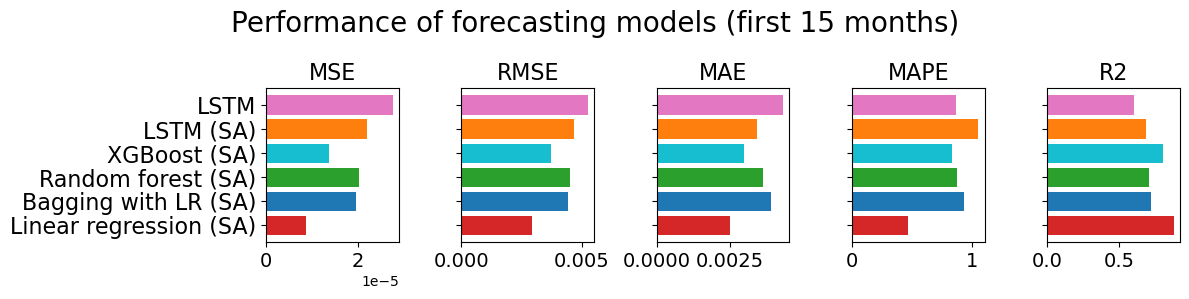

In [36]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Performance of forecasting models (first 15 months)', fontsize=20)

bar_labels = ['red', 'blue', 'green', 'cyan', 'orange', 'pink']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:cyan', 'tab:orange', 'tab:pink']

ax1.barh(error['model'], error['MSE'], label=bar_labels, color=bar_colors)
ax1.set_title('MSE', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=16)

ax2.barh(error['model'], error['RMSE'], color=bar_colors)
ax2.set_title('RMSE', fontsize=16)
ax2.set_yticklabels(['', '', '', ''])
ax2.tick_params(axis='x', labelsize=14)

ax3.barh(error['model'], error['MAE'], color=bar_colors)
ax3.set_title('MAE', fontsize=16)
ax3.set_yticklabels(['', '', '', ''])
ax3.tick_params(axis='x', labelsize=14)

ax4.barh(error['model'], error['MAPE'], color=bar_colors)
ax4.set_title('MAPE', fontsize=16)
ax4.set_yticklabels(['', '', '', ''])
ax4.tick_params(axis='x', labelsize=14)

ax5.barh(error['model'], error['R2'], color=bar_colors)
ax5.set_title('R2', fontsize=16)
ax5.set_yticklabels(['', '', '', ''])
ax5.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.savefig('figures/comparisons_all_first.eps', format='eps')
plt.show()

In [57]:
window_min = 15
window_max = 30

In [58]:
MSE[0] = mean_squared_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])
RMSE[0] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max]))
MAE[0] = mean_absolute_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])
MAPE[0] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])
R2[0] = r2_score(y[window_min:window_max], y_hat_linear_regression[window_min:window_max])

In [59]:
MSE[1] = mean_squared_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])
RMSE[1] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max]))
MAE[1] = mean_absolute_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])
MAPE[1] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])
R2[1] = r2_score(y[window_min:window_max], y_hat_ensemble_LR[window_min:window_max])

In [60]:
MSE[2] = mean_squared_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max])
RMSE[2] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max]))
MAE[2] = mean_absolute_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max])
MAPE[2] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_random_forest[window_min:window_max])
R2[2] = r2_score(y[window_min:window_max], y_hat_random_forest[window_min:window_max])

In [61]:
MSE[3] = mean_squared_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])
RMSE[3] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max]))
MAE[3] = mean_absolute_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])
MAPE[3] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])
R2[3] = r2_score(y[window_min:window_max], y_hat_XGBoost[window_min:window_max])

In [62]:
MSE[4] = mean_squared_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])
RMSE[4] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max]))
MAE[4] = mean_absolute_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])
MAPE[4] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])
R2[4] = r2_score(y[window_min:window_max], y_hat_LSTM_sa[window_min:window_max])

In [63]:
MSE[5] = mean_squared_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max])
RMSE[5] = sqrt(mean_squared_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max]))
MAE[5] = mean_absolute_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max])
MAPE[5] = mean_absolute_percentage_error(y[window_min:window_max], y_hat_LSTM[window_min:window_max])
R2[5] = r2_score(y[window_min:window_max], y_hat_LSTM[window_min:window_max])

In [64]:
models = ['Linear regression (SA)', \
          'Bagging with LR (SA)', \
          'Random forest (SA)', \
          'XGBoost (SA)', \
          'LSTM (SA)', \
          'LSTM']

In [65]:
error = pd.DataFrame({ \
    'MSE': MSE, \
    'RMSE': RMSE, \
    'MAE': MAE, \
    'MAPE': MAPE, \
    'R2': R2, \
    'model': models})

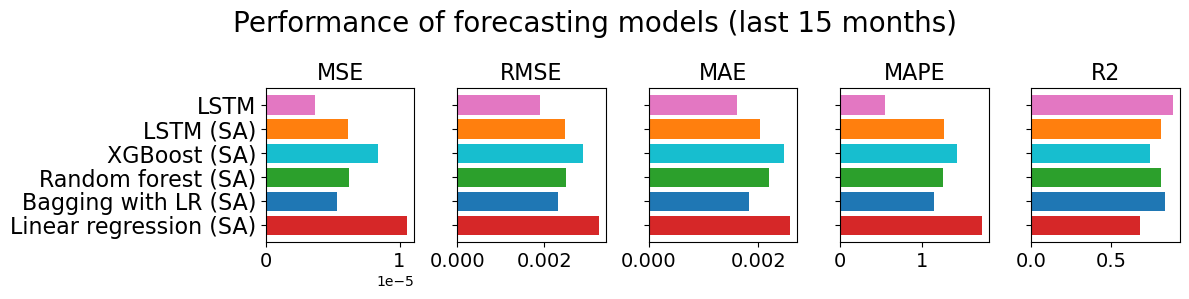

In [66]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, figsize=(12, 3))
fig.suptitle('Performance of forecasting models (last 15 months)', fontsize=20)

bar_labels = ['red', 'blue', 'green', 'cyan', 'orange', 'pink']
bar_colors = ['tab:red', 'tab:blue', 'tab:green', 'tab:cyan', 'tab:orange', 'tab:pink']

ax1.barh(error['model'], error['MSE'], label=bar_labels, color=bar_colors)
ax1.set_title('MSE', fontsize=16)
ax1.tick_params(axis='x', labelsize=14)
ax1.tick_params(axis='y', labelsize=16)

ax2.barh(error['model'], error['RMSE'], color=bar_colors)
ax2.set_title('RMSE', fontsize=16)
ax2.set_yticklabels(['', '', '', ''])
ax2.tick_params(axis='x', labelsize=14)

ax3.barh(error['model'], error['MAE'], color=bar_colors)
ax3.set_title('MAE', fontsize=16)
ax3.set_yticklabels(['', '', '', ''])
ax3.tick_params(axis='x', labelsize=14)

ax4.barh(error['model'], error['MAPE'], color=bar_colors)
ax4.set_title('MAPE', fontsize=16)
ax4.set_yticklabels(['', '', '', ''])
ax4.tick_params(axis='x', labelsize=14)

ax5.barh(error['model'], error['R2'], color=bar_colors)
ax5.set_title('R2', fontsize=16)
ax5.set_yticklabels(['', '', '', ''])
ax5.tick_params(axis='x', labelsize=14)

plt.tight_layout()
plt.savefig('figures/comparisons_all_last.eps', format='eps')
plt.show()